<a href="https://colab.research.google.com/github/farhana786/Data-Science-Projects/blob/main/us_accidents_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Accidents Exploratory Data Analysis

Aim of this hands-on is to build Exploratory Data Analysis project from scratch. 

* Dataset source is kaggle. 

* It contains information about accidents happen in US.

* Can be useful to prevent accidents.

* Does not contain data about New York state.

In [1]:
pip install opendatasets

In [2]:
import opendatasets as od
download_url = ("https://www.kaggle.com/sobhanmoosavi/us-accidents")
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: farhana786
Your Kaggle Key: ··········


100%|██████████| 117M/117M [00:04<00:00, 30.4MB/s]


## Download the data

In [3]:
data_file = '/content/us-accidents/US_Accidents_Dec20_updated.csv'

### Data Preparation and Cleaning using Pandas & Numpy
1. Load the file using Pandas
2. Look at some information about data and columns
3. Clean incoorect values and fix missing data

In [4]:
import pandas as pd

In [ ]:
df = pd.read_csv(data_file)
df

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

len(newdf.columns)

#### Percetange of missing values per column

In [ ]:
missing_percentage = df.isna().sum().sort_values(ascending = False) / len(df) *100
missing_percentage

In [ ]:
missing_percentage[missing_percentage != 0]

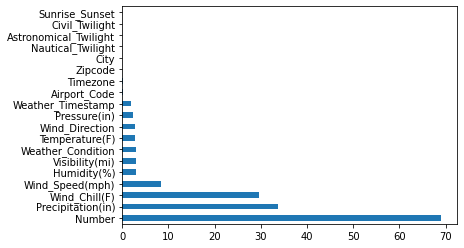

In [ ]:
missing_percentage[missing_percentage != 0].plot(kind = 'barh')

#### Remove columns which we don't want to use

## Exploratory Analysis and Visualization using Matplotlib & Seaborn

Columns we'll analyze

1. City
2. Start Time
3. Start Lat
4. Start Lng
5. Temparature
6. Weather Condition


### 1. City

In [ ]:
unique_cities = df.City.unique()
len(unique_cities)

In [ ]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents[:30]

In [ ]:
'NYC' in df.City

In [ ]:
cities_by_accidents[:20].plot(kind = 'barh')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

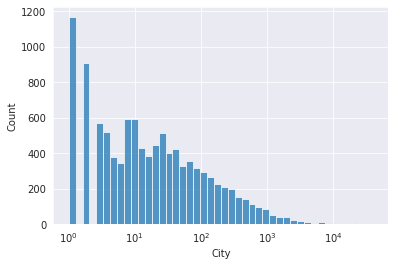

In [ ]:
sns.histplot(cities_by_accidents,log_scale=True)

In [ ]:
cities_by_accidents[cities_by_accidents == 1]

Samson         1
Cairnbrook     1
Flinton        1
Township 9     1
Duck Hill      1
              ..
Pace           1
Black River    1
Auxvasse       1
Hermanville    1
Joshua         1
Name: City, Length: 1167, dtype: int64

In [ ]:
high_accident_cities = cities_by_accidents[cities_by_accidents >= 1000]
low_accident_cities = cities_by_accidents[cities_by_accidents <1000]

In [ ]:
len(high_accident_cities) /len(unique_cities)

0.023550384687558643

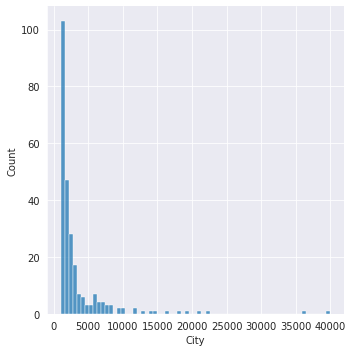

In [ ]:
sns.displot(high_accident_cities)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


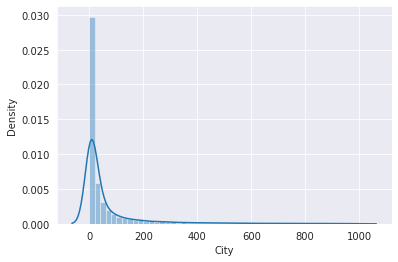

In [ ]:
sns.distplot(low_accident_cities)

### 2. Start Time

In [ ]:
pd.to_datetime(df.Start_Time)

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:15:39
4         2016-02-08 06:51:45
                  ...        
1516059   2019-08-23 18:03:25
1516060   2019-08-23 19:11:30
1516061   2019-08-23 19:00:21
1516062   2019-08-23 19:00:21
1516063   2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: datetime64[ns]

In [ ]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:15:39
4          2016-02-08 06:51:45
                  ...         
1516059    2019-08-23 18:03:25
1516060    2019-08-23 19:11:30
1516061    2019-08-23 19:00:21
1516062    2019-08-23 19:00:21
1516063    2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: object

In [ ]:
# parse date 
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:15:39
4         2016-02-08 06:51:45
                  ...        
1516059   2019-08-23 18:03:25
1516060   2019-08-23 19:11:30
1516061   2019-08-23 19:00:21
1516062   2019-08-23 19:00:21
1516063   2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: datetime64[ns]

In [ ]:
df.Start_Time[1].hour

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


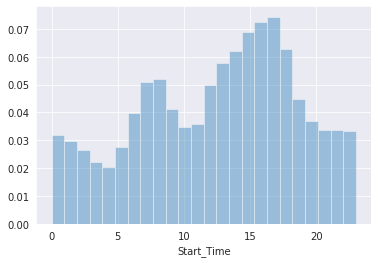

In [ ]:
sns.distplot(df.Start_Time.dt.hour, bins = 24, kde = False, norm_hist = True)

    A high percentage accidents occur during 1PM to 6PM

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


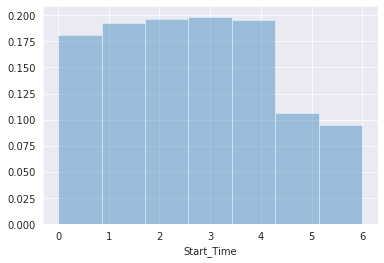

In [ ]:
sns.distplot(df.Start_Time.dt.dayofweek, bins = 7, kde = False, norm_hist = True)

    Is the distribution of accidents by hour the same on weekends as on weekdays?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


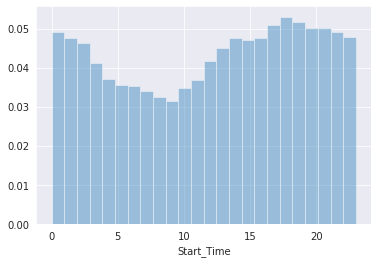

In [ ]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins = 24, kde = False, norm_hist = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


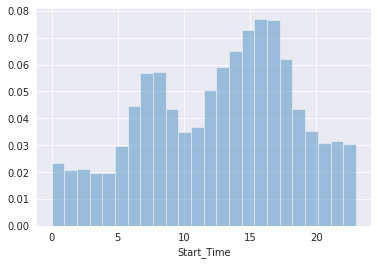

In [ ]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(mondays_start_time.dt.hour, bins = 24, kde = False, norm_hist = True)

    On sundays the peek occurs between 12AM to 2AM and 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


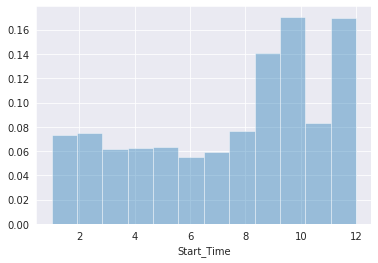

In [ ]:
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins = 12, kde = False, norm_hist = True)

    Can you explain monthwise trend of accidents?

    Answer - Much data is missing for 2016 and maybe for 2017

#### Start_Lat and Start_Lng

In [9]:
df.Start_Lat

0          40.10891
1          39.86542
2          39.10266
3          39.10148
4          41.06213
             ...   
1516059    34.00248
1516060    32.76696
1516061    33.77545
1516062    33.99246
1516063    34.13393
Name: Start_Lat, Length: 1516064, dtype: float64

In [10]:
df.Start_Lng

0          -83.09286
1          -84.06280
2          -84.52468
3          -84.52341
4          -81.53784
             ...    
1516059   -117.37936
1516060   -117.14806
1516061   -117.84779
1516062   -118.40302
1516063   -117.23092
Name: Start_Lng, Length: 1516064, dtype: float64

In [11]:
sample_df = df.sample(int (0.1 * len(df)))
sns.scatterplot(x= sample_df.Start_Lng, y= sample_df.Start_Lat, size = 0.001)

NameError: ignored

# Ask & answer questions about the data in a Jupyter notebook
1. Are there more accidents in warmer or colder area?
2. Which are the 5 states that have highest numbers of accidents? How about per capita?
3. Does New York show up in the data? If yes, then why is the count lower if it is the most populated city.
4. Among the top 100 cities of highest number of accedents, which states do they belong to most frequently?
5. What time of the day are accidents frequent in?
6. Which days of the week the have most accidents?
7. WHich month have the most accidents?
8. Which is the trend of accidents year over year (decreasing or increasing)
9. When is accidents per unit of traffic the highest?

# Summary and Conclusion

* No data available for New York
* The number of accidents per city decreases exponetially. 
* Less than 5% cities have more than 1000 yearly accidents 
* 1167 cities reported just one accident (need to investigate)